In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
import torch
import torchvision
import sys
sys.path.insert(0, "../")
import mytorch
from mytorch.tensor import Tensor
from mytorch import nn

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The aim of this notebook is to recreate the pytorch_mnist notebook using mytorch

### Load data

I'll use torchvision to load the data just for convenience, all training will be done using only mytorch and numpy

In [49]:
train_batch_size = 64
test_batch_size = 64

In [50]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./datasets', train=True, download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(0, 1)
                              ])),
    batch_size=train_batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./datasets', train=False, download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(0, 1)
                              ])),
    batch_size=test_batch_size, shuffle=True
)

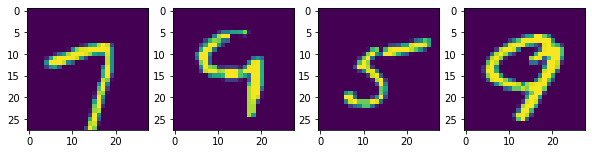

In [51]:
# visualize some images
train_iter = iter(train_loader)
images, labels = train_iter.next()
plt.figure(figsize=(10,8))
for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    ax.imshow(images[i].reshape(28, 28))

### Build simple neural network using mytorch

In [52]:
def initialize_weights():
    # weights and bias for each layer
    return [Tensor(np.random.randn(784, 200)), Tensor(np.random.randn(200,)), 
            Tensor(np.random.randn(200, 10)), Tensor(np.random.randn(10,))]

In [54]:
W1, b1, W2, b2 = initialize_weights()
lr = 0.01
losses = []
accuracies = []
for epoch in range(10):
    total_loss = 0
    total_accuracy = 0
    for i, data in tqdm(enumerate(train_loader)):
        images, labels = data
        images = images.numpy() #(64, 1, 28, 28)
        if images.shape[0] != train_batch_size:
            continue
        labels = Tensor(labels.numpy()) #(64,)
        batch_size = images.shape[0]
        
        # forward pass
        images = Tensor(images.reshape(batch_size, -1))
        H1 = images.dot(W1) + b1 # (64, 200)
        relu = nn.Relu()
        A1 = relu(H1) # (64, 200)
        H2 = A1.dot(W2) + b2 # (64, 10)
        
        # calculate loss
        cross_entropy_loss = nn.CrossEntropyLoss()
        loss = cross_entropy_loss(H2, labels)
        losses.append(loss.data)
        total_loss += loss.data
        
        # calculate accuracy
        accuracy = (np.argmax(H2.data, axis=1) == labels.data).sum() / labels.shape[0]
        accuracies.append(accuracy)
        total_accuracy += accuracy
        
        # backward pass, compute gradients
        loss.backward()
        
        # SGD update weights
        W1.data = W1.data - lr * W1.grad
        W2.data = W2.data - lr * W2.grad
        b1.data = b1.data - lr * b1.grad
        b2.data = b2.data - lr * b2.grad
#         print(W1.shape, W2.shape, b1.shape, b2.shape)
    print(f'Epoch {epoch+1}, Loss: {total_loss/(i+1)}, Accuracy: {total_accuracy/(i+1)}')

938it [00:14, 63.87it/s]
6it [00:00, 56.58it/s]

Epoch 1, Loss: 12.778641257321505, Accuracy: 0.6989772121535182


938it [00:17, 52.52it/s]
7it [00:00, 60.18it/s]

Epoch 2, Loss: 4.853083392466618, Accuracy: 0.8332389392324094


938it [00:16, 57.23it/s]
6it [00:00, 57.95it/s]

Epoch 3, Loss: 3.5997829213988144, Accuracy: 0.8587586620469083


938it [00:21, 44.43it/s]
7it [00:00, 64.88it/s]

Epoch 4, Loss: 2.927121522567985, Accuracy: 0.8740005330490405


938it [00:14, 65.36it/s]
7it [00:00, 65.77it/s]

Epoch 5, Loss: 2.4777167298568914, Accuracy: 0.8830956823027718


938it [00:13, 67.48it/s]
7it [00:00, 67.67it/s]

Epoch 6, Loss: 2.164930260678149, Accuracy: 0.8897254797441365


938it [00:14, 66.69it/s]
7it [00:00, 67.94it/s]

Epoch 7, Loss: 1.9247955889036135, Accuracy: 0.8956389925373134


938it [00:13, 68.35it/s]
7it [00:00, 67.63it/s]

Epoch 8, Loss: 1.7298802235237292, Accuracy: 0.9003031716417911


938it [00:13, 67.88it/s]
7it [00:00, 66.94it/s]

Epoch 9, Loss: 1.5752739428210143, Accuracy: 0.9039179104477612


938it [00:13, 67.88it/s]

Epoch 10, Loss: 1.4410425929940567, Accuracy: 0.9073160980810234


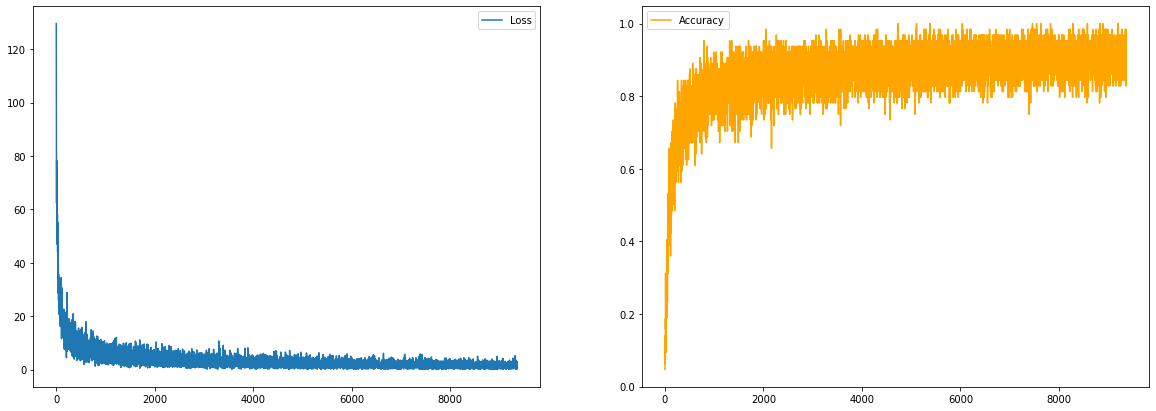

In [55]:
plt.figure(figsize=(20,7))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(losses)
ax1.legend(['Loss'])
ax2 = plt.subplot(1, 2, 2)
ax2.plot(accuracies, color='orange')
ax2.legend(['Accuracy'])
plt.show()

In [57]:
correct = 0
total = 0
for data in test_loader:
    images, labels = data
    images = images.numpy().reshape(images.shape[0], -1)
    if images.shape[0] != 64:
        continue
    images = Tensor(images)
    labels = Tensor(labels.numpy())
    
    # forward pass
    H1 = images.dot(W1) + b1 # (64, 200)
    A1 = relu(H1) # (64, 200)
    H2 = A1.dot(W2) + b2 # (64, 10)
    
    correct += (np.argmax(H2.data, axis=1) == labels.data).sum()
    total += labels.shape[0]
print(f'Accuracy on test set: {correct / total}')

Accuracy on test set: 0.9042467948717948
